In [1]:
import torch
from torch import nn

import math
import matplotlib.pyplot as plt

In [2]:
torch.manual_seed(111)

In [3]:
train_data_length = 1024
train_data = torch.zeros((train_data_length, 2))
train_data[:,0] = 2* math.pi* torch.rand(train_data_length)
train_data[:,1] = torch.sin(train_data[:,0])
train_labels = torch.zeros(train_data_length)
train_set = [
    (train_data[i], train_labels[i]) for i in range(train_data_length)
]

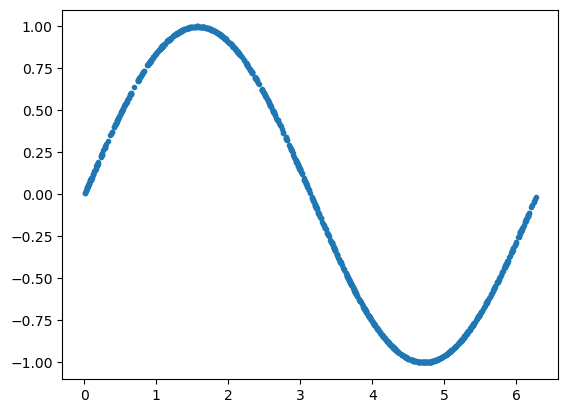

In [4]:
plt.plot(train_data[:,0], train_data[:,1], ".")

In [5]:
batch_size = 32
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=batch_size, shuffle=True
)

In [6]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
        nn.Linear(2,256),
        nn.ReLU(),
        nn.Dropout(0.3),
        nn.Linear(256,128),
        nn.ReLU(),
        nn.Dropout(0.3),
        nn.Linear(128, 64),
        nn.ReLU(),
        nn.Dropout(0.3),
        nn.Linear(64, 1),
        nn.Sigmoid()
        )
        
    def forward(self, x):
        output = self.model(x)
        return output

In [7]:
discriminator = Discriminator()

In [8]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2,16),
            nn.ReLU(),
            nn.Linear(16,32),
            nn.ReLU(),
            nn.Linear(32, 2)
        )
        
    def forward(self, x):
        output = self.model(x)
        return output
        
generator = Generator()

In [9]:
lr = 0.001 #learning rate
num_epochs = 300
loss_function = nn.BCELoss()

In [10]:
optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=lr)
optimizer_generator = torch.optim.Adam(generator.parameters(), lr=lr)

Epoch: 0 Loss D: 0.156594917178154
Epoch: 0 Loss G: 2.1254444122314453
Epoch: 10 Loss D: 0.7301512956619263
Epoch: 10 Loss G: 0.8579632639884949
Epoch: 20 Loss D: 0.5785327553749084
Epoch: 20 Loss G: 1.1377501487731934
Epoch: 30 Loss D: 0.5292068123817444
Epoch: 30 Loss G: 0.9324854612350464
Epoch: 40 Loss D: 0.5566464066505432
Epoch: 40 Loss G: 1.3090707063674927
Epoch: 50 Loss D: 0.6536816358566284
Epoch: 50 Loss G: 0.7635598182678223
Epoch: 60 Loss D: 0.6679659485816956
Epoch: 60 Loss G: 0.8043714761734009
Epoch: 70 Loss D: 0.722793698310852
Epoch: 70 Loss G: 0.744573175907135
Epoch: 80 Loss D: 0.6874617338180542
Epoch: 80 Loss G: 0.7912455797195435
Epoch: 90 Loss D: 0.6270873546600342
Epoch: 90 Loss G: 0.7635820508003235
Epoch: 100 Loss D: 0.6689925789833069
Epoch: 100 Loss G: 0.7036857604980469
Epoch: 110 Loss D: 0.703092098236084
Epoch: 110 Loss G: 0.9398205876350403
Epoch: 120 Loss D: 0.6160258054733276
Epoch: 120 Loss G: 0.8022952079772949
Epoch: 130 Loss D: 0.6128950119018555


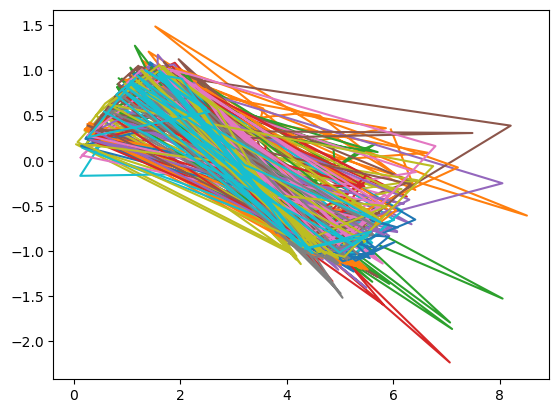

In [11]:
for epoch in range(num_epochs):
    for n, (real_samples, _) in enumerate(train_loader):
        # training data for discriminator
        real_sample_labels = torch.ones((batch_size, 1))
        latent_space_samples = torch.randn((batch_size, 2))
        generated_samples = generator(latent_space_samples)
        generated_sample_labels = torch.zeros((batch_size, 1))
        all_samples = torch.cat((real_samples, generated_samples))
        all_sample_labels = torch.cat(
            (real_sample_labels, generated_sample_labels)
        )
        
        # Training the discriminator
        discriminator.zero_grad()
        output_discriminator = discriminator(all_samples)
        loss_discriminator = loss_function(
        output_discriminator, all_sample_labels)
        loss_discriminator.backward()
        optimizer_discriminator.step()
        
        # data for generator training
        latent_space_samples = torch.randn(batch_size, 2)
        
        # training the generator
        generator.zero_grad()
        generated_samples = generator(latent_space_samples)
        output_discriminator_generated = discriminator(generated_samples)
        loss_generator = loss_function(
            output_discriminator_generated, real_sample_labels
        )
        loss_generator.backward()
        optimizer_generator.step()
        
        #show loss
        
        if epoch % 10 == 0 and n == batch_size - 1:
            print(f"Epoch: {epoch} Loss D: {loss_discriminator}")
            print(f"Epoch: {epoch} Loss G: {loss_generator}")

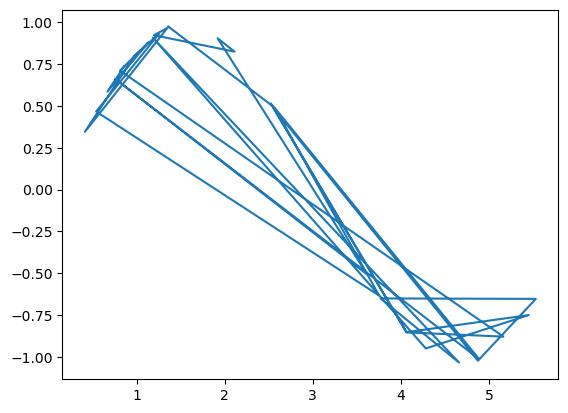

In [12]:
generated_samples = generated_samples.detach()
plt.plot(generated_samples[:, 0], generated_samples[:, 1])